**Life expectancy prediction**

In [ ]:
from google.colab import files
uploaded = files.upload()

#uploading the csv file locally

Saving led.csv to led.csv


Libraries imported

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
#import nbinteract as nbi
import re
import os
from scipy.stats import spearmanr
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn.linear_model as lm
from sklearn import datasets, linear_model, model_selection
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
import sklearn
from sklearn import metrics
from sklearn import tree
from sklearn import datasets
from sklearn import preprocessing

#importing necessary libraries

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['led.csv']))

#reading the csv file into a dataframe

In [ ]:
df.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,...,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


**Data** **dictionary**

Country : Country

Year : Year

Status : Developed or Developing status

Life expectancy : Life Expectancy in age

Adult Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths : Number of Infant Deaths per 1000 population

Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

Percentage : Expenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles : Measles - number of reported cases per 1000 population

BMI : Average Body Mass Index of entire population

Under-five deaths : Number of under-five deaths per 1000 population

Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria : Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS : Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP : Gross Domestic Product per capita (in USD)

Population : Population of the country

Thinness 1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Thinness 5-9 years : Prevalence of thinness among children for Age 5 to 9(%)

Schooling : Number of years of Schooling(years)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df.isnull().sum()

#checking for null values

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

In [ ]:
df.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**Data cleaning and exploratory Data analysis**

In [ ]:
df = df.dropna()
#Listwise deletion

(array([ 38.,  57., 100., 126., 210., 229., 526., 234., 100.,  29.]),
 array([44. , 48.5, 53. , 57.5, 62. , 66.5, 71. , 75.5, 80. , 84.5, 89. ]),
 <a list of 10 Patch objects>)

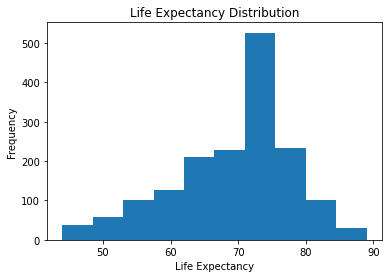

In [ ]:
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.title("Life Expectancy Distribution")
plt.hist(df['Lifeexpectancy'])

#To check the frequency of Life Expectancy, we notice the highest frequency at 72 years

Text(0, 0.5, 'count')

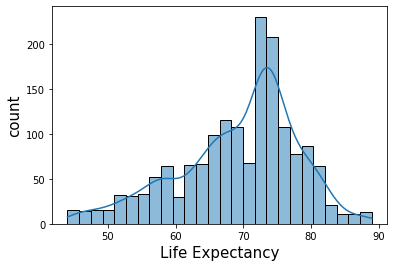

In [ ]:
a = sns.histplot(data=df, x="Lifeexpectancy", kde=True)
a.set_xlabel("Life Expectancy", fontsize = 15)
a.set_ylabel("count" , fontsize = 15)

#Same plot as above using seaborn

Text(0, 0.5, 'Life Expectancy')

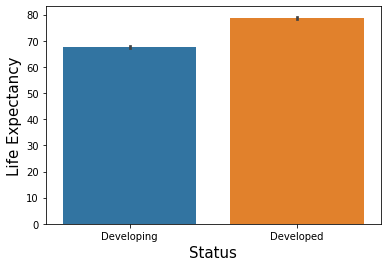

In [ ]:
b = sns.barplot(x = df['Status'],y=df['Lifeexpectancy'])

b.set_xlabel("Status", fontsize = 15)
b.set_ylabel("Life Expectancy" , fontsize = 15)

#Plot of Life Expectancy in Developing vs developed countries

Text(0, 0.5, 'Life Expectancy')

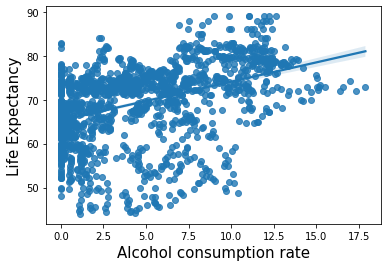

In [ ]:
c = sns.regplot(x=df['Alcohol'],y=df['Lifeexpectancy'])
c.set_xlabel("Alcohol consumption rate", fontsize = 15)
c.set_ylabel("Life Expectancy" , fontsize = 15)


Text(0, 0.5, 'Life Expectancy')

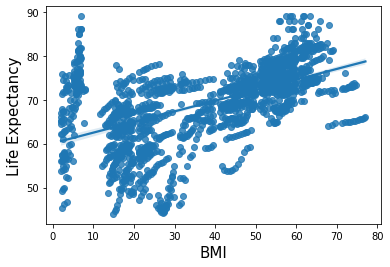

In [ ]:
d = sns.regplot(x=df['BMI'],y=df['Lifeexpectancy'])
d.set_xlabel("BMI", fontsize = 15)
d.set_ylabel("Life Expectancy" , fontsize = 15)


Text(0, 0.5, 'Life Expectancy')

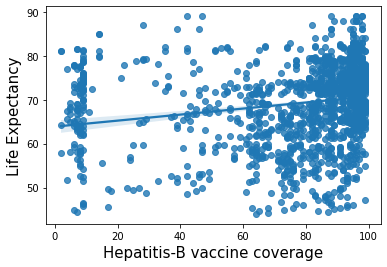

In [ ]:
e = sns.regplot(x=df['HepatitisB'],y=df['Lifeexpectancy'])
e.set_xlabel("Hepatitis-B vaccine coverage", fontsize = 15)
e.set_ylabel("Life Expectancy" , fontsize = 15)


Text(0, 0.5, 'Life Expectancy')

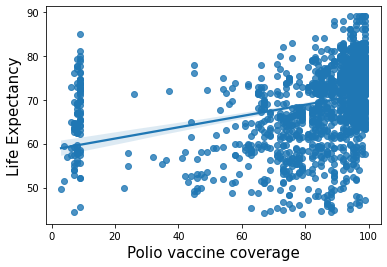

In [ ]:
b=sns.regplot(x=df['Polio'],y=df['Lifeexpectancy'])
b.set_xlabel("Polio vaccine coverage", fontsize = 15)
b.set_ylabel("Life Expectancy" , fontsize = 15)


Text(0, 0.5, 'Life Expectancy')

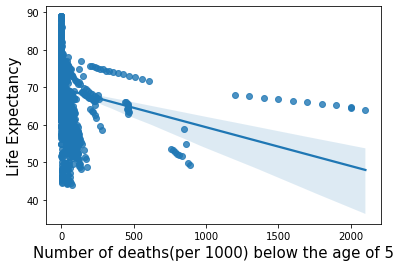

In [ ]:
b=sns.regplot(x=df['under-fivedeaths'],y=df['Lifeexpectancy'])
b.set_xlabel("Number of deaths(per 1000) below the age of 5", fontsize = 15)
b.set_ylabel("Life Expectancy" , fontsize = 15)


Text(0, 0.5, 'Life Expectancy')

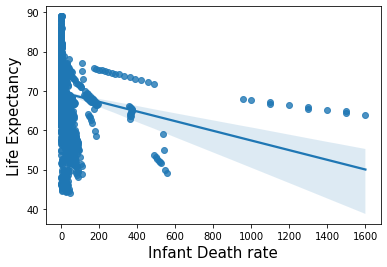

In [ ]:
b=sns.regplot(x=df['infantdeaths'],y=df['Lifeexpectancy'])
b.set_xlabel("Infant Death rate", fontsize = 15)
b.set_ylabel("Life Expectancy" , fontsize = 15)


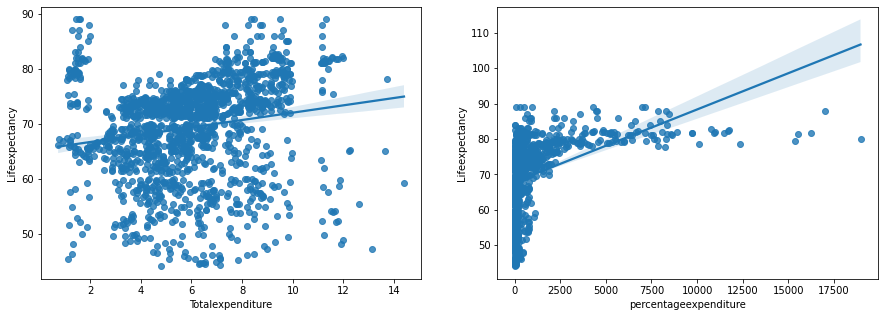

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.regplot(x=df['Totalexpenditure'],y=df['Lifeexpectancy'])
plt.subplot(122)
sns.regplot(x=df['percentageexpenditure'],y=df['Lifeexpectancy'])

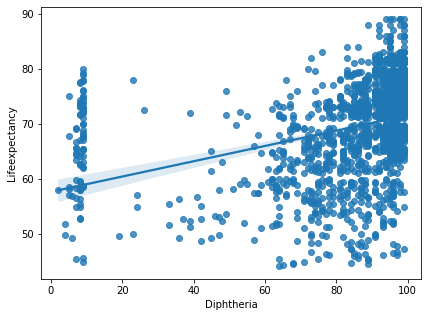

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.regplot(x=df['Diphtheria'],y=df['Lifeexpectancy'])

Analysis of alcohol consumption based on status of countries

In [ ]:
df['Alcohol_Category'] = pd.Categorical(np.zeros(len(df.index)), categories=[ '0 to 5', '5 to 10', '10 to 15', '15 to 20'])
df['Alcohol_Category'][df.Alcohol.between(0,5)] = '0 to 5'
df['Alcohol_Category'][df.Alcohol.between(5,10)] = '5 to 10'
df['Alcohol_Category'][df.Alcohol.between(10,15)] = '10 to 15'
df['Alcohol_Category'][df.Alcohol.between(15,20)] = '15 to 20'
df
#categorizing alcohol data into 4 groups. Data visualizations were performed on this categorized data.

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,Alcohol_Category
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0 to 5
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0 to 5
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0 to 5
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0 to 5
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0 to 5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0 to 5
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0 to 5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0 to 5
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0 to 5


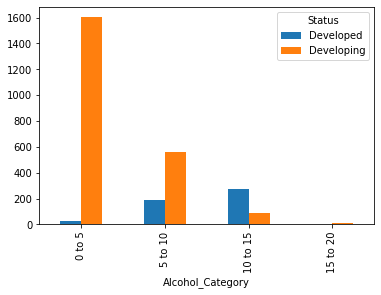

In [ ]:
df_ctgy = pd.crosstab(df["Alcohol_Category"], df["Status"])
plt.show(df_ctgy.plot(kind="bar"))

#The graph illustrates alcohol consumption rate with respect to status of the country. We see that both developing and developed countries have low to medium alcohol consumption rate.

Effect of Alcohol consumption on life expectancy

In [ ]:
df['LE_Category'] = pd.Categorical(np.zeros(len(df.index)), categories=[ '0 to 10', '10 to 20', '20 to 30', '30 to 40', '40 to 50', '50 to 60', '60 to 70', '70 to 80', '80 to 90', '90 to 100'])
df['LE_Category'][df.Lifeexpectancy.between(0,10)] = '0 to 10'
df['LE_Category'][df.Lifeexpectancy.between(10,20)] = '10 to 20'
df['LE_Category'][df.Lifeexpectancy.between(20,30)] = '20 to 30'
df['LE_Category'][df.Lifeexpectancy.between(30,40)] = '30 to 40'
df['LE_Category'][df.Lifeexpectancy.between(40,50)] = '40 to 50'
df['LE_Category'][df.Lifeexpectancy.between(50,60)] = '50 to 60'
df['LE_Category'][df.Lifeexpectancy.between(60,70)] = '60 to 70'
df['LE_Category'][df.Lifeexpectancy.between(70,80)] = '70 to 80'
df['LE_Category'][df.Lifeexpectancy.between(80,90)] = '80 to 90'
df['LE_Category'][df.Lifeexpectancy.between(90,100)] = '90 to 100'
df
#We classify life expectancy rate into 10 categories, in order to get a visual which is easy to understand.

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,Alcohol_Category,LE_Category
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0 to 5,60 to 70
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0 to 5,50 to 60
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0 to 5,50 to 60
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0 to 5,50 to 60
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0 to 5,50 to 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0 to 5,40 to 50
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0 to 5,40 to 50
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0 to 5,40 to 50
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0 to 5,40 to 50


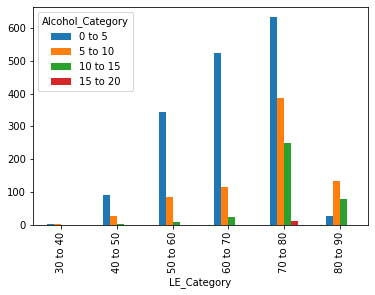

In [ ]:
df_ctgy = pd.crosstab(df["LE_Category"], df["Alcohol_Category"])
plt.show(df_ctgy.plot(kind="bar"))

#The graph shows life expectancy rate depending on consumption of alcohol. We see that alcohol consumption does not much affect the lifespan of the people living in a country. 
#So we would recommend people to consume alcohol but everything done in a limit is good.

Effect of adult mortality on life expectancy

In [ ]:
df['Adult_mortality_Category'] = pd.Categorical(np.zeros(len(df.index)), categories=[ '0 to 200', '200 to 400', '400 to 600', '600 to 800'])
df['Adult_mortality_Category'][df.AdultMortality.between(0,200)] = '0 to 200'
df['Adult_mortality_Category'][df.AdultMortality.between(200,400)] = '200 to 400'
df['Adult_mortality_Category'][df.AdultMortality.between(400,600)] = '400 to 600'
df['Adult_mortality_Category'][df.AdultMortality.between(600,800)] = '600 to 800'

df

#classified adult mortality into several categories in order to get a visual graph which is easy to understand

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,Alcohol_Category,LE_Category,Adult_mortality_Category
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0 to 5,60 to 70,200 to 400
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0 to 5,50 to 60,200 to 400
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0 to 5,50 to 60,200 to 400
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0 to 5,50 to 60,200 to 400
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0 to 5,50 to 60,200 to 400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0 to 5,40 to 50,600 to 800
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0 to 5,40 to 50,600 to 800
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0 to 5,40 to 50,0 to 200
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0 to 5,40 to 50,600 to 800


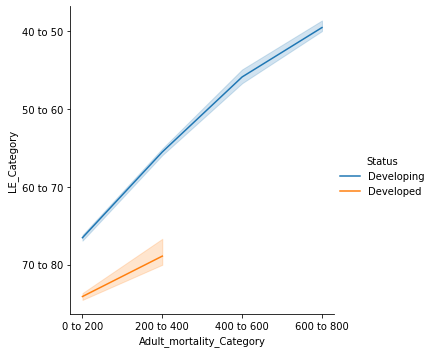

In [ ]:
df_ctgy = pd.crosstab(df["LE_Category"], df["Adult_mortality_Category"])

sns.relplot(x="Adult_mortality_Category", y="LE_Category", kind = 'line', hue = 'Status', data=df);

#Life expectancy improves as adult mortality rate goes down. Adult mortality was less for developing nations as compared to developed nations.

Analysis of life expectancy over the years 

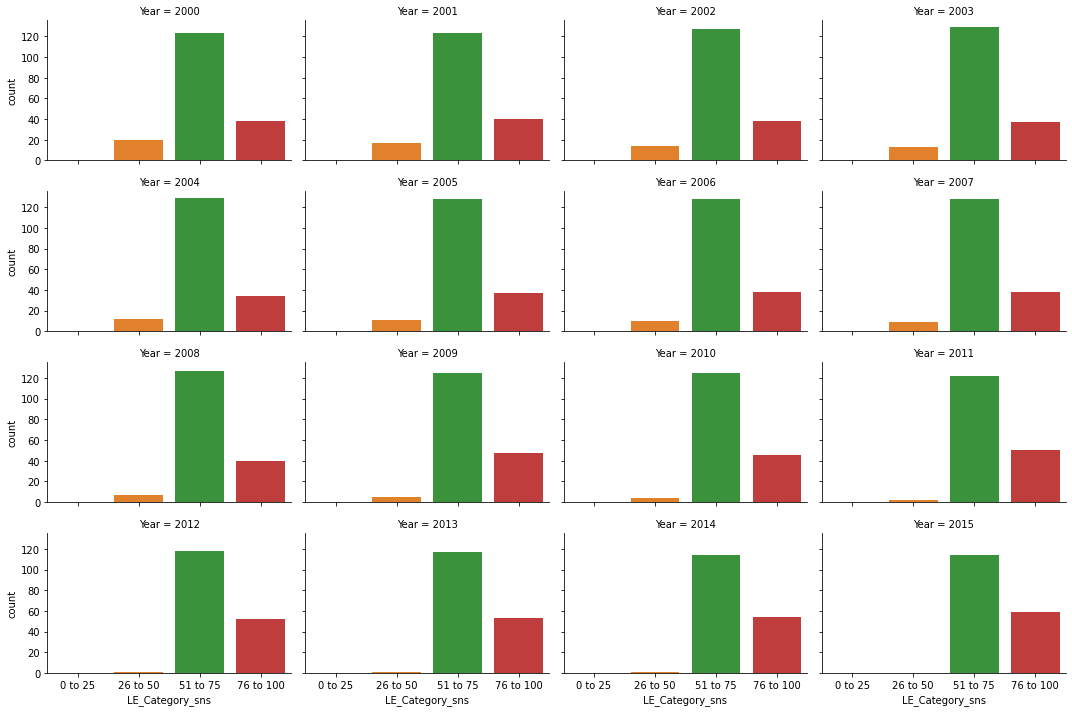

In [ ]:
import io
df1 = df
df1['LE_Category_sns'] = pd.Categorical(np.zeros(len(df.index)), categories=[ '0 to 25','26 to 50','51 to 75','76 to 100'])
df1['LE_Category_sns'][df1.Lifeexpectancy.between(0,25)] = '0 to 25'
df1['LE_Category_sns'][df1.Lifeexpectancy.between(26,50)] = '26 to 50'
df1['LE_Category_sns'][df1.Lifeexpectancy.between(51,75)] = '51 to 75'
df1['LE_Category_sns'][df1.Lifeexpectancy.between(76,100)] = '76 to 100'

plot_LE = sns.catplot(x="LE_Category_sns", col="Year", col_wrap=4,
                data=df1[df1.Year.notnull()],
                kind="count", height=2.5, aspect=1.5)

# The graph shows that the life expectancy improved over the years.

Linear regression model

corr=nan, p=nan
                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     535.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.11e-108
Time:                        20:11:20   Log-Likelihood:                -9807.4
No. Observations:                2735   AIC:                         1.962e+04
Df Residuals:                    2733   BIC:                         1.963e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.7633      0.253    

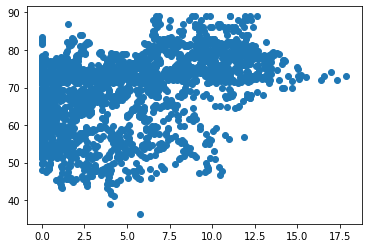

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
new = df[['Lifeexpectancy', 'Alcohol']].copy()

plt.scatter(x=df['Alcohol'], y=df['Lifeexpectancy'])
corr, p = spearmanr(df['Alcohol'],df['Lifeexpectancy'])
print('corr=%.3f, p=%.3f' % (corr,p))
#Fitting a model
results_model = smf.ols('Lifeexpectancy ~ Alcohol', data=df).fit()
#Print Linear Regression Results
print(results_model.summary())

Drop null or missing data from dataframe

In [ ]:
#len(X_test)
new
df.dropna(inplace=True)

In [ ]:
df.head()

,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,Alcohol_Category,LE_Category,Adult_mortality_Category,LE_Category_sns
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0 to 5,60 to 70,200 to 400,51 to 75
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0 to 5,50 to 60,200 to 400,51 to 75
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0 to 5,50 to 60,200 to 400,51 to 75
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0 to 5,50 to 60,200 to 400,51 to 75
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0 to 5,50 to 60,200 to 400,51 to 75


Multiple linear regression model

                              Year  ...  Schooling
Year                          1.00  ...       0.09
Lifeexpectancy                0.05  ...       0.77
AdultMortality               -0.00  ...      -0.46
infantdeaths                  0.00  ...      -0.56
Alcohol                      -0.18  ...       0.61
percentageexpenditure         0.13  ...       0.62
HepatitisB                    0.12  ...       0.36
Measles                      -0.06  ...      -0.23
BMI                           0.05  ...       0.62
under-fivedeaths              0.01  ...      -0.57
Polio                        -0.01  ...       0.47
Totalexpenditure              0.06  ...       0.26
Diphtheria                    0.02  ...       0.49
HIV/AIDS                      0.06  ...      -0.57
GDP                           0.14  ...       0.64
Population                    0.05  ...      -0.06
thinness1-19years             0.01  ...      -0.58
thinness5-9years              0.01  ...      -0.57
Incomecompositionofresources  0

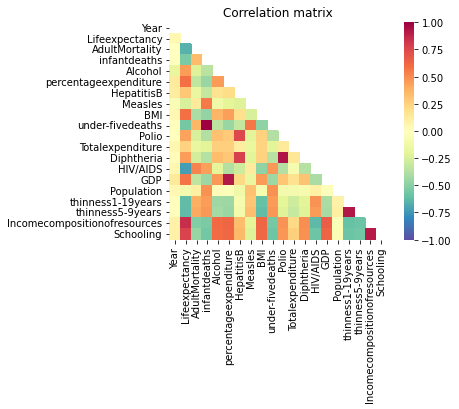

In [ ]:
print(df.corr(method = "spearman").round(2))
correlation = df.corr(method = "spearman")
mask_data = np.zeros_like(correlation)
mask_data[np.triu_indices_from(mask_data)] = True
sns.heatmap(correlation, cmap='Spectral_r', mask=mask_data, square=True, vmin=-1, vmax=1)
plt.title('Correlation matrix')

#Create the dataframes for X and Y
X_led_features = pd.DataFrame(data=df,columns=['AdultMortality','infantdeaths','Alcohol','percentageexpenditure','HepatitisB','Measles','BMI','under-fivedeaths','Polio','Totalexpenditure','Diphtheria','HIV/AIDS','GDP','Population','thinness1-19years','thinness5-9years','Incomecompositionofresources','Schooling'])
Y_led_target = pd.DataFrame(data=df,columns=['Lifeexpectancy'])

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_led_features, Y_led_target, test_size = 0.20, random_state = 5)

linear_model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
Y_pred = linear_model.predict(sm.add_constant(X_test))
print_model = linear_model.summary()
print(print_model)

#VIF factor
x_temp_old = sm.add_constant(X_train)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp_old.values, i) for i in range(x_temp_old.values.shape[1])]
vif["features"] = x_temp_old.columns
print(vif.round(1))

In [ ]:
df_new=X_led_features.drop(['infantdeaths'], axis=1).drop(['under-fivedeaths'], axis=1).drop(['GDP'], axis=1).drop(['thinness1-19years'], axis=1).drop(['thinness5-9years'], axis=1)

#dropping variables based on VIF factor and p-values

In [ ]:
#build the model again with remaining variables
X_1 = df_new
Y_1 = Y_led_target

X1_train, X1_test, Y1_train, Y1_test = sklearn.model_selection.train_test_split(X_1, Y_1, test_size = 0.20, random_state = 5)

# For each X, calculate VIF and save in dataframe
x_temp = sm.add_constant(X1_train)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
print(vif.round(1))

model = sm.OLS(Y1_train, sm.add_constant(X1_train)).fit()
Y1_pred = model.predict(sm.add_constant(X1_test))
print_model = model.summary()
print(print_model)

    VIF Factor                      features
0         52.1                         const
1          1.6                AdultMortality
2          1.9                       Alcohol
3          1.4         percentageexpenditure
4          1.7                    HepatitisB
5          1.1                       Measles
6          1.5                           BMI
7          1.7                         Polio
8          1.1              Totalexpenditure
9          2.1                    Diphtheria
10         1.4                      HIV/AIDS
11         1.1                    Population
12         3.0  Incomecompositionofresources
13         3.5                     Schooling
                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     460.7
Date:    

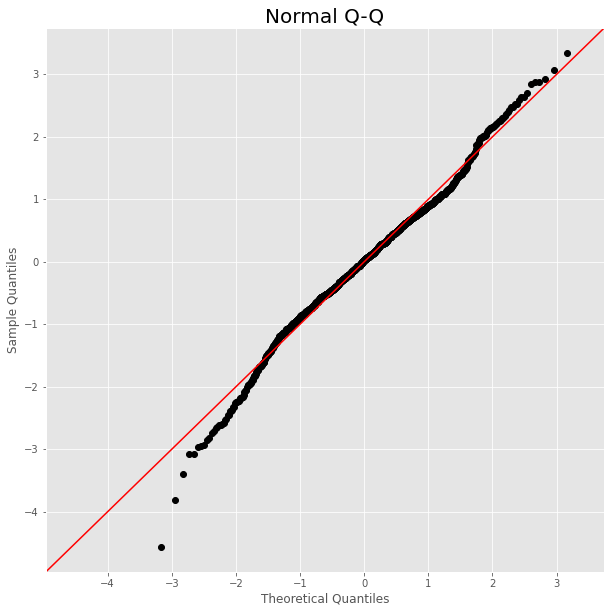

In [ ]:
plt.rc('figure', figsize=(10,10))
plt.style.use('ggplot')

probplot = sm.ProbPlot(model.get_influence().resid_studentized_internal, fit=True)
fig = probplot.qqplot(line='45', marker='o', color='black')
plt.title('Normal Q-Q', fontsize=20)
plt.show()

#Plot to check if residuals are normally distributed after fitting the model. The black line is almost entirely on the red line which shows that the distribution is almost normal distribution.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Residuals')

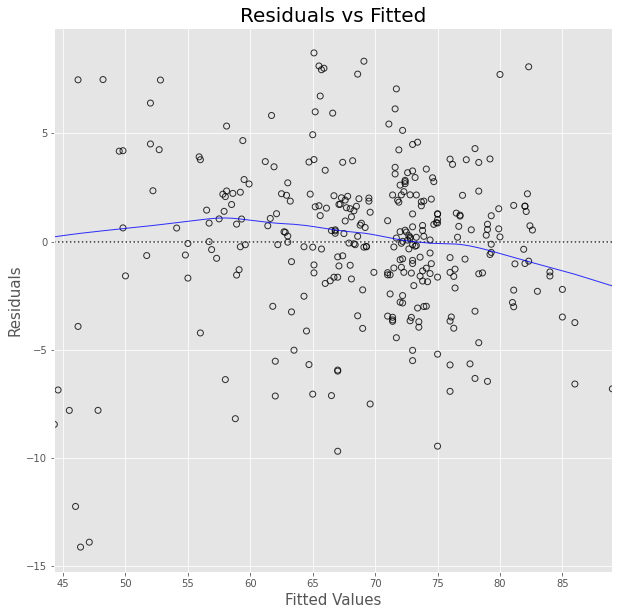

In [ ]:
sns.residplot(Y1_test,Y1_pred, lowess=True, 
                          scatter_kws={'facecolors':'none', 'edgecolors':'black'}, 
                          line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8})
plt.title('Residuals vs Fitted', fontsize=20)
plt.xlabel('Fitted Values', fontsize=15)
plt.ylabel('Residuals', fontsize=15)

#Plot to check if linearity assumption is satisfied after building the model. The graph shows that the blue line is almost in sync with the dashed line which illustrates that there is almost linear relationship between variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

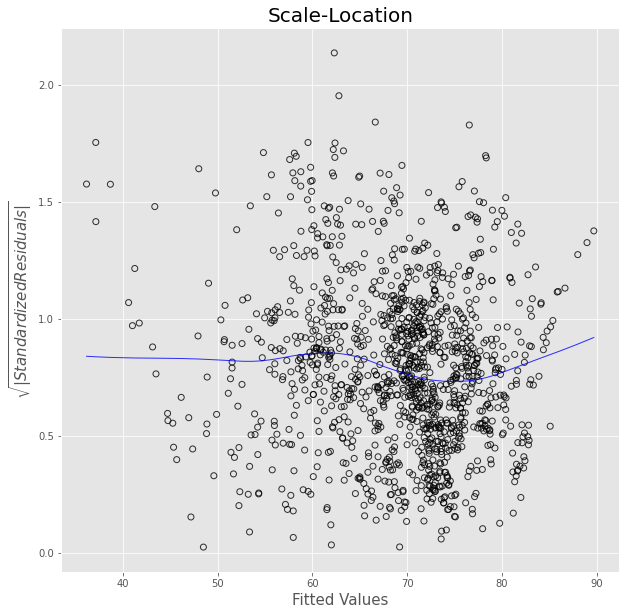

In [ ]:
#Scale-Location Plot

sns.regplot(model.fittedvalues, 
           np.sqrt(np.abs(model.get_influence().resid_studentized_internal)), 
            scatter=True, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8},
          scatter_kws={'facecolors':'none', 'edgecolors':'black'})

plt.title('Scale-Location', fontsize=20)
plt.xlabel('Fitted Values', fontsize=15)
plt.ylabel('$\sqrt{|Standardized Residuals|}$', fontsize=15)

#Plot to check if equal variance assumption is satisfied or not. The blue line is almost horizontal which shows that variances are almost equal.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


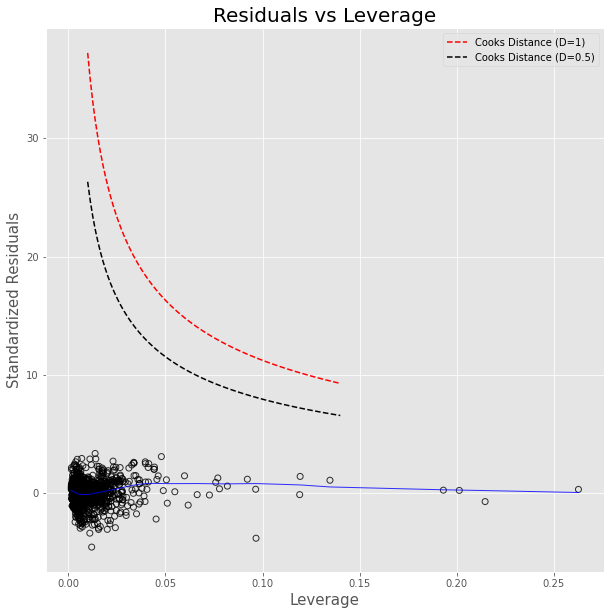

In [ ]:
#Residuals vs Leverage

from numpy import sqrt

def one_line(x):
    return sqrt((1 * len(model.params) * (1 - x)) / x)

def point_five_line(x):
    return sqrt((0.5 * len(model.params) * (1 - x)) / x)
    
    
    
def show_cooks_distance_lines(tx,inc,color,label):
    plt.plot(inc,tx(inc), label=label,color=color, ls='--')
    
        

sns.regplot(model.get_influence().hat_matrix_diag, 
           model.get_influence().resid_studentized_internal, 
            scatter=True, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'blue', 'lw': 1, 'alpha': 0.8},
          scatter_kws={'facecolors':'none', 'edgecolors':'black'})

show_cooks_distance_lines(one_line,
                        np.linspace(.01,.14,100),
                          'red',
                          'Cooks Distance (D=1)' )

show_cooks_distance_lines(point_five_line,
                          np.linspace(.01,.14,100),
                          'black',
                          'Cooks Distance (D=0.5)')

plt.title('Residuals vs Leverage', fontsize=20)
plt.xlabel('Leverage', fontsize=15)
plt.ylabel('Standardized Residuals', fontsize=15)
plt.legend()

#The plot illustrates outliers if any in the dataset. The plot shows that there is one outlier in the far right that might be a influential outlier.

Decision tree model

In [ ]:
df = df.drop(['Alcohol_Category','LE_Category','LE_Category_sns','Country','Status','Adult_mortality_Category'],axis='columns') #'LE_Category_1',
df
#dropping all the extra variables (created while doing initial analysis) in order to build decision tree model

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,LE_Category_1
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0


In [ ]:
df['LE_Category_1'] = pd.Categorical(np.zeros(len(df.index)), categories=['0', '1'])
df['LE_Category_1'][df.Lifeexpectancy.between(0,70)] = '0'
df['LE_Category_1'][df.Lifeexpectancy.between(70,100)] = '1'
df
#since decision tree is built when response variable has a binary value (0 or 1), we categorize life expectancy values into two categories, 0 to 70 years is considered as 1 and 70 to 100 is considered 0.

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,LE_Category_1
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0


In [ ]:
df_decisiontree = df
df_decisiontree = df_decisiontree.drop(['Lifeexpectancy'],axis='columns')

# drop the output variable (lifeexpectancy) since now we have categorized binary values of life expectancy

In [ ]:
X = df_decisiontree.iloc[:,0:19]
X
y = df_decisiontree.iloc[:,19]
X = sm.add_constant(X)
y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=33)

#build the model

In [ ]:
decision_tree = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=3) #build the model using entropy criterion

In [ ]:
decision_tree_gini = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=3) #build the model using gini criterion

In [ ]:
decision_tree = decision_tree.fit(X_train, y_train)
prediction_tree = decision_tree.predict(X_test)

In [ ]:
decision_tree_gini = decision_tree_gini.fit(X_train, y_train)
prediction_tree = decision_tree_gini.predict(X_test)

In [ ]:
print(decision_tree_gini.score(X_test, y_test))

0.9338582677165355


In [ ]:
print(decision_tree.score(X_test, y_test))

0.9417322834645669


In [ ]:
print(decision_tree.score(X_train, y_train))

1.0


In [ ]:
print(decision_tree_gini.score(X_train, y_train))

0.9989484752891693


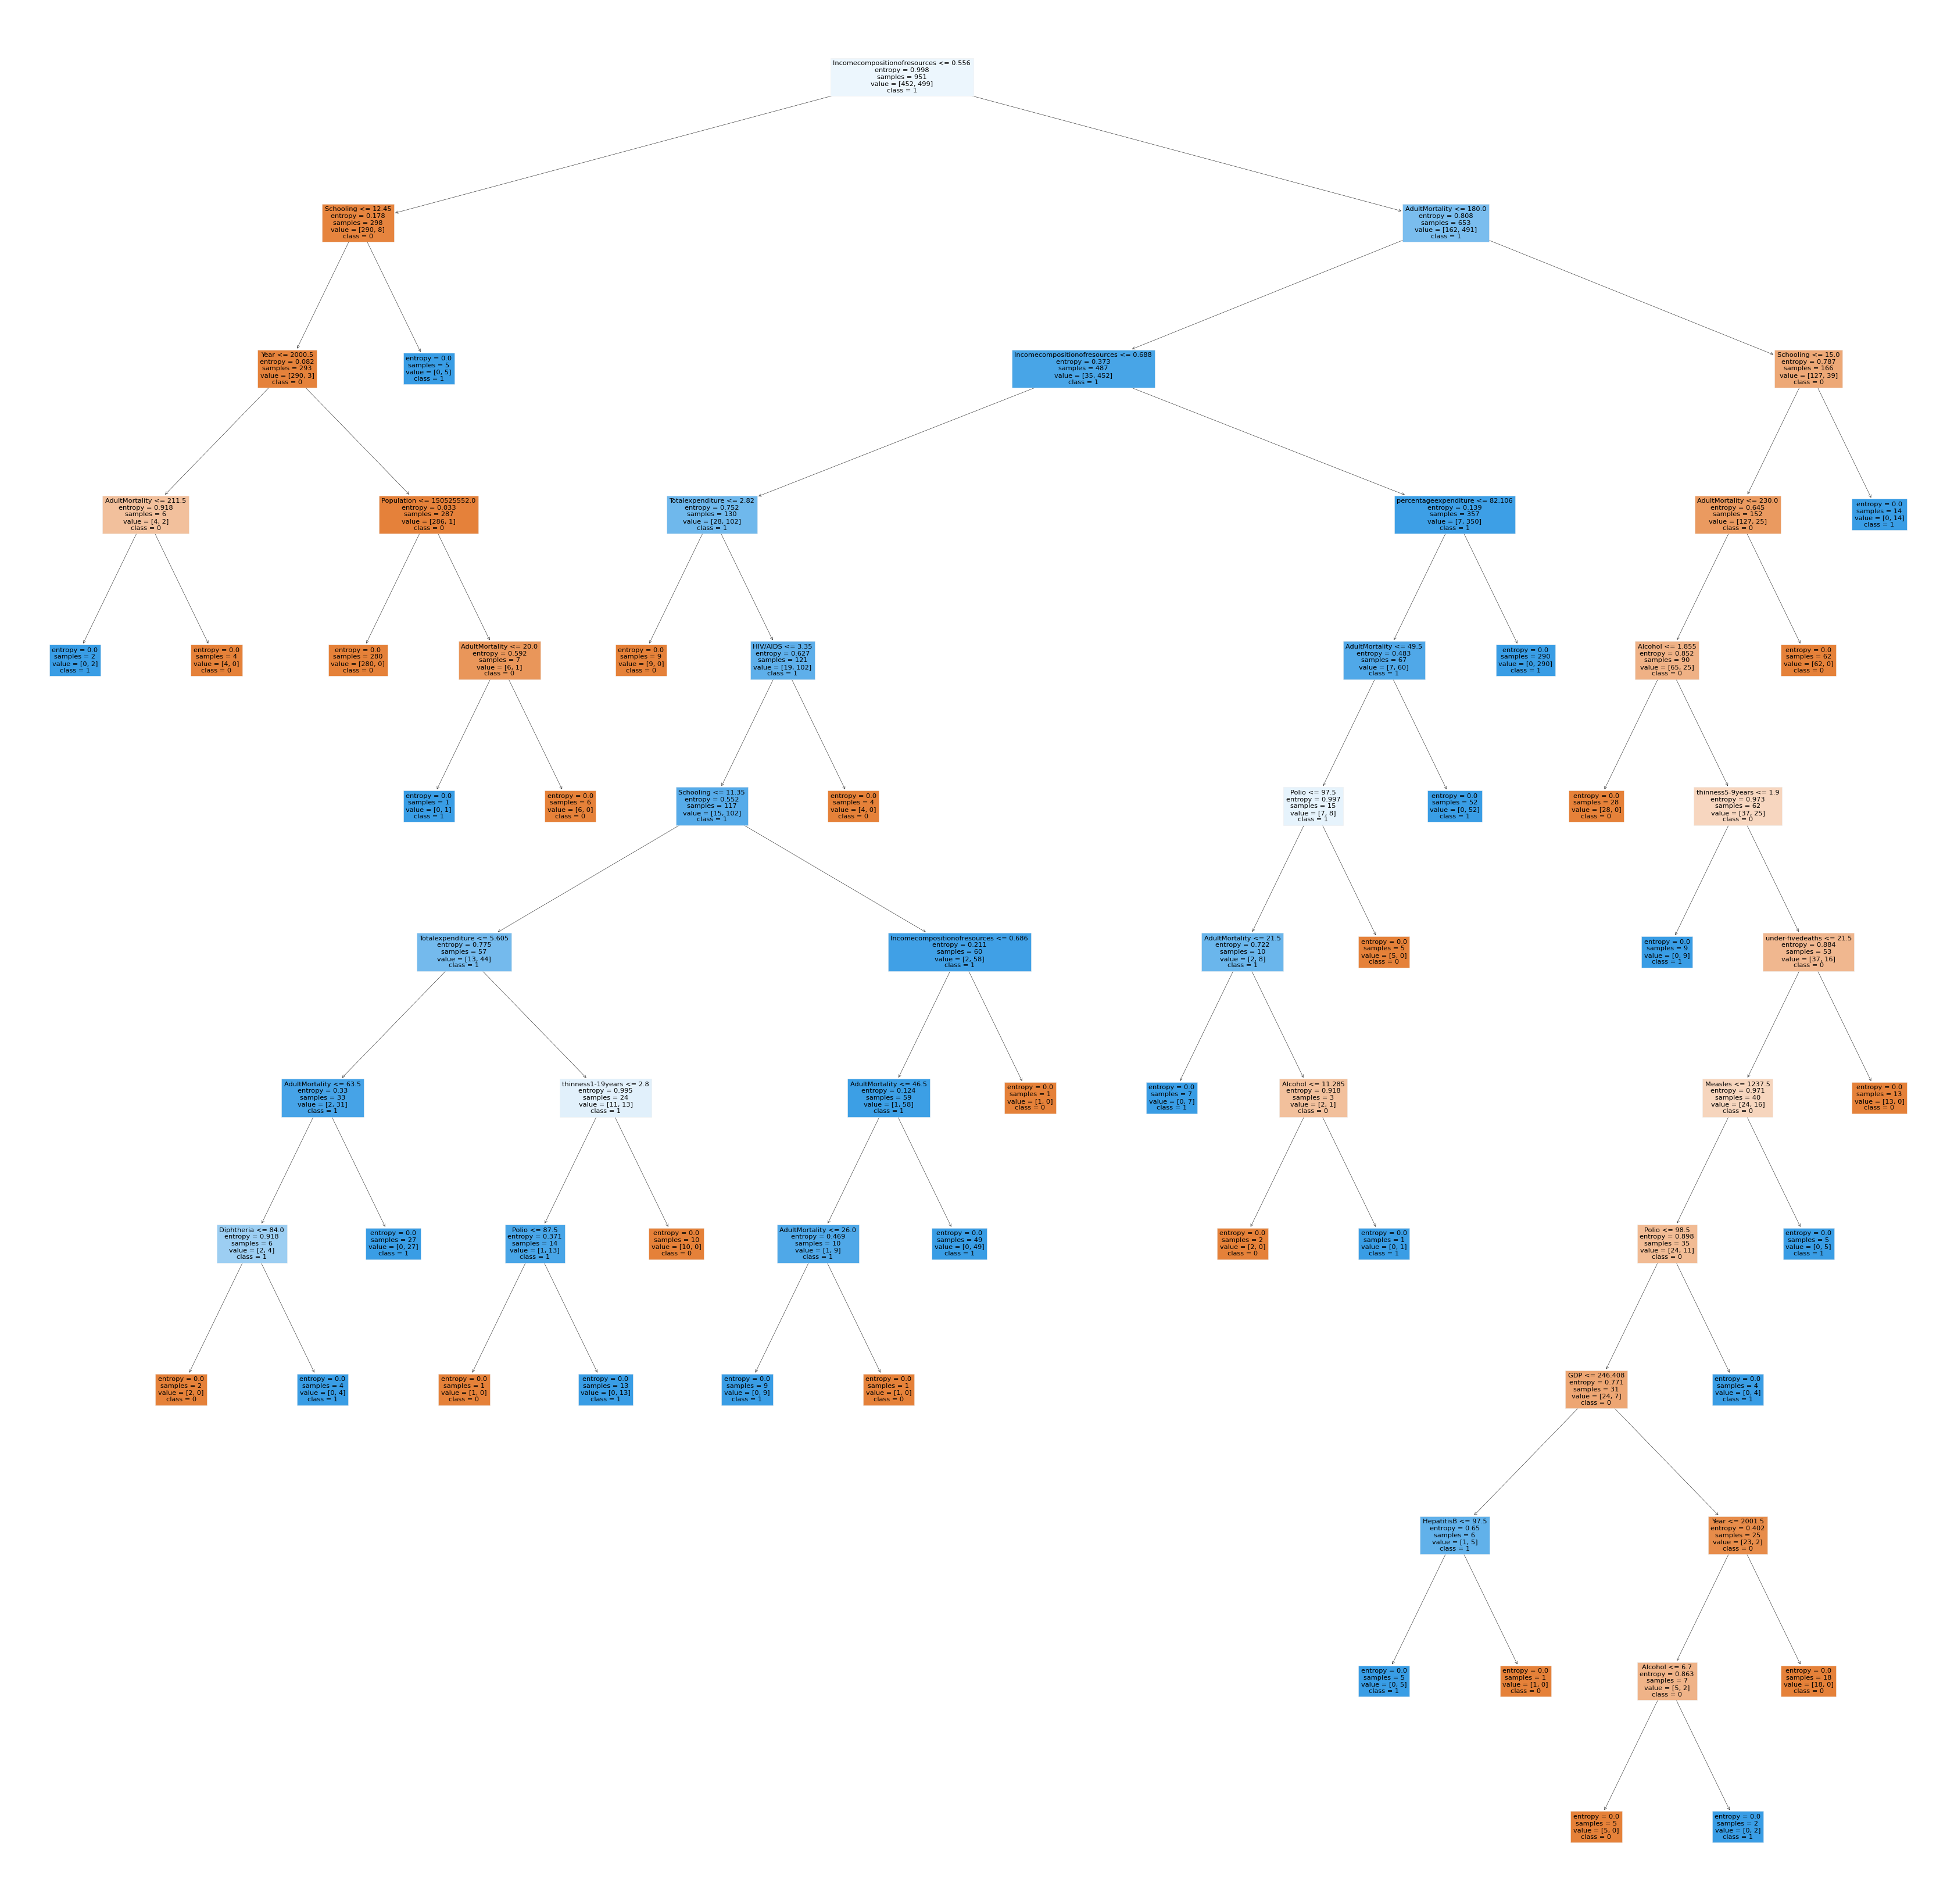

In [ ]:
fig = plt.figure(figsize=(60,60))
_ = tree.plot_tree(decision_tree, 
                   feature_names=X_train.columns,  
                   class_names=['0','1'],
                   filled=True)
fig.savefig('image.png')

#plotted the decision tree graph using entropy criteria

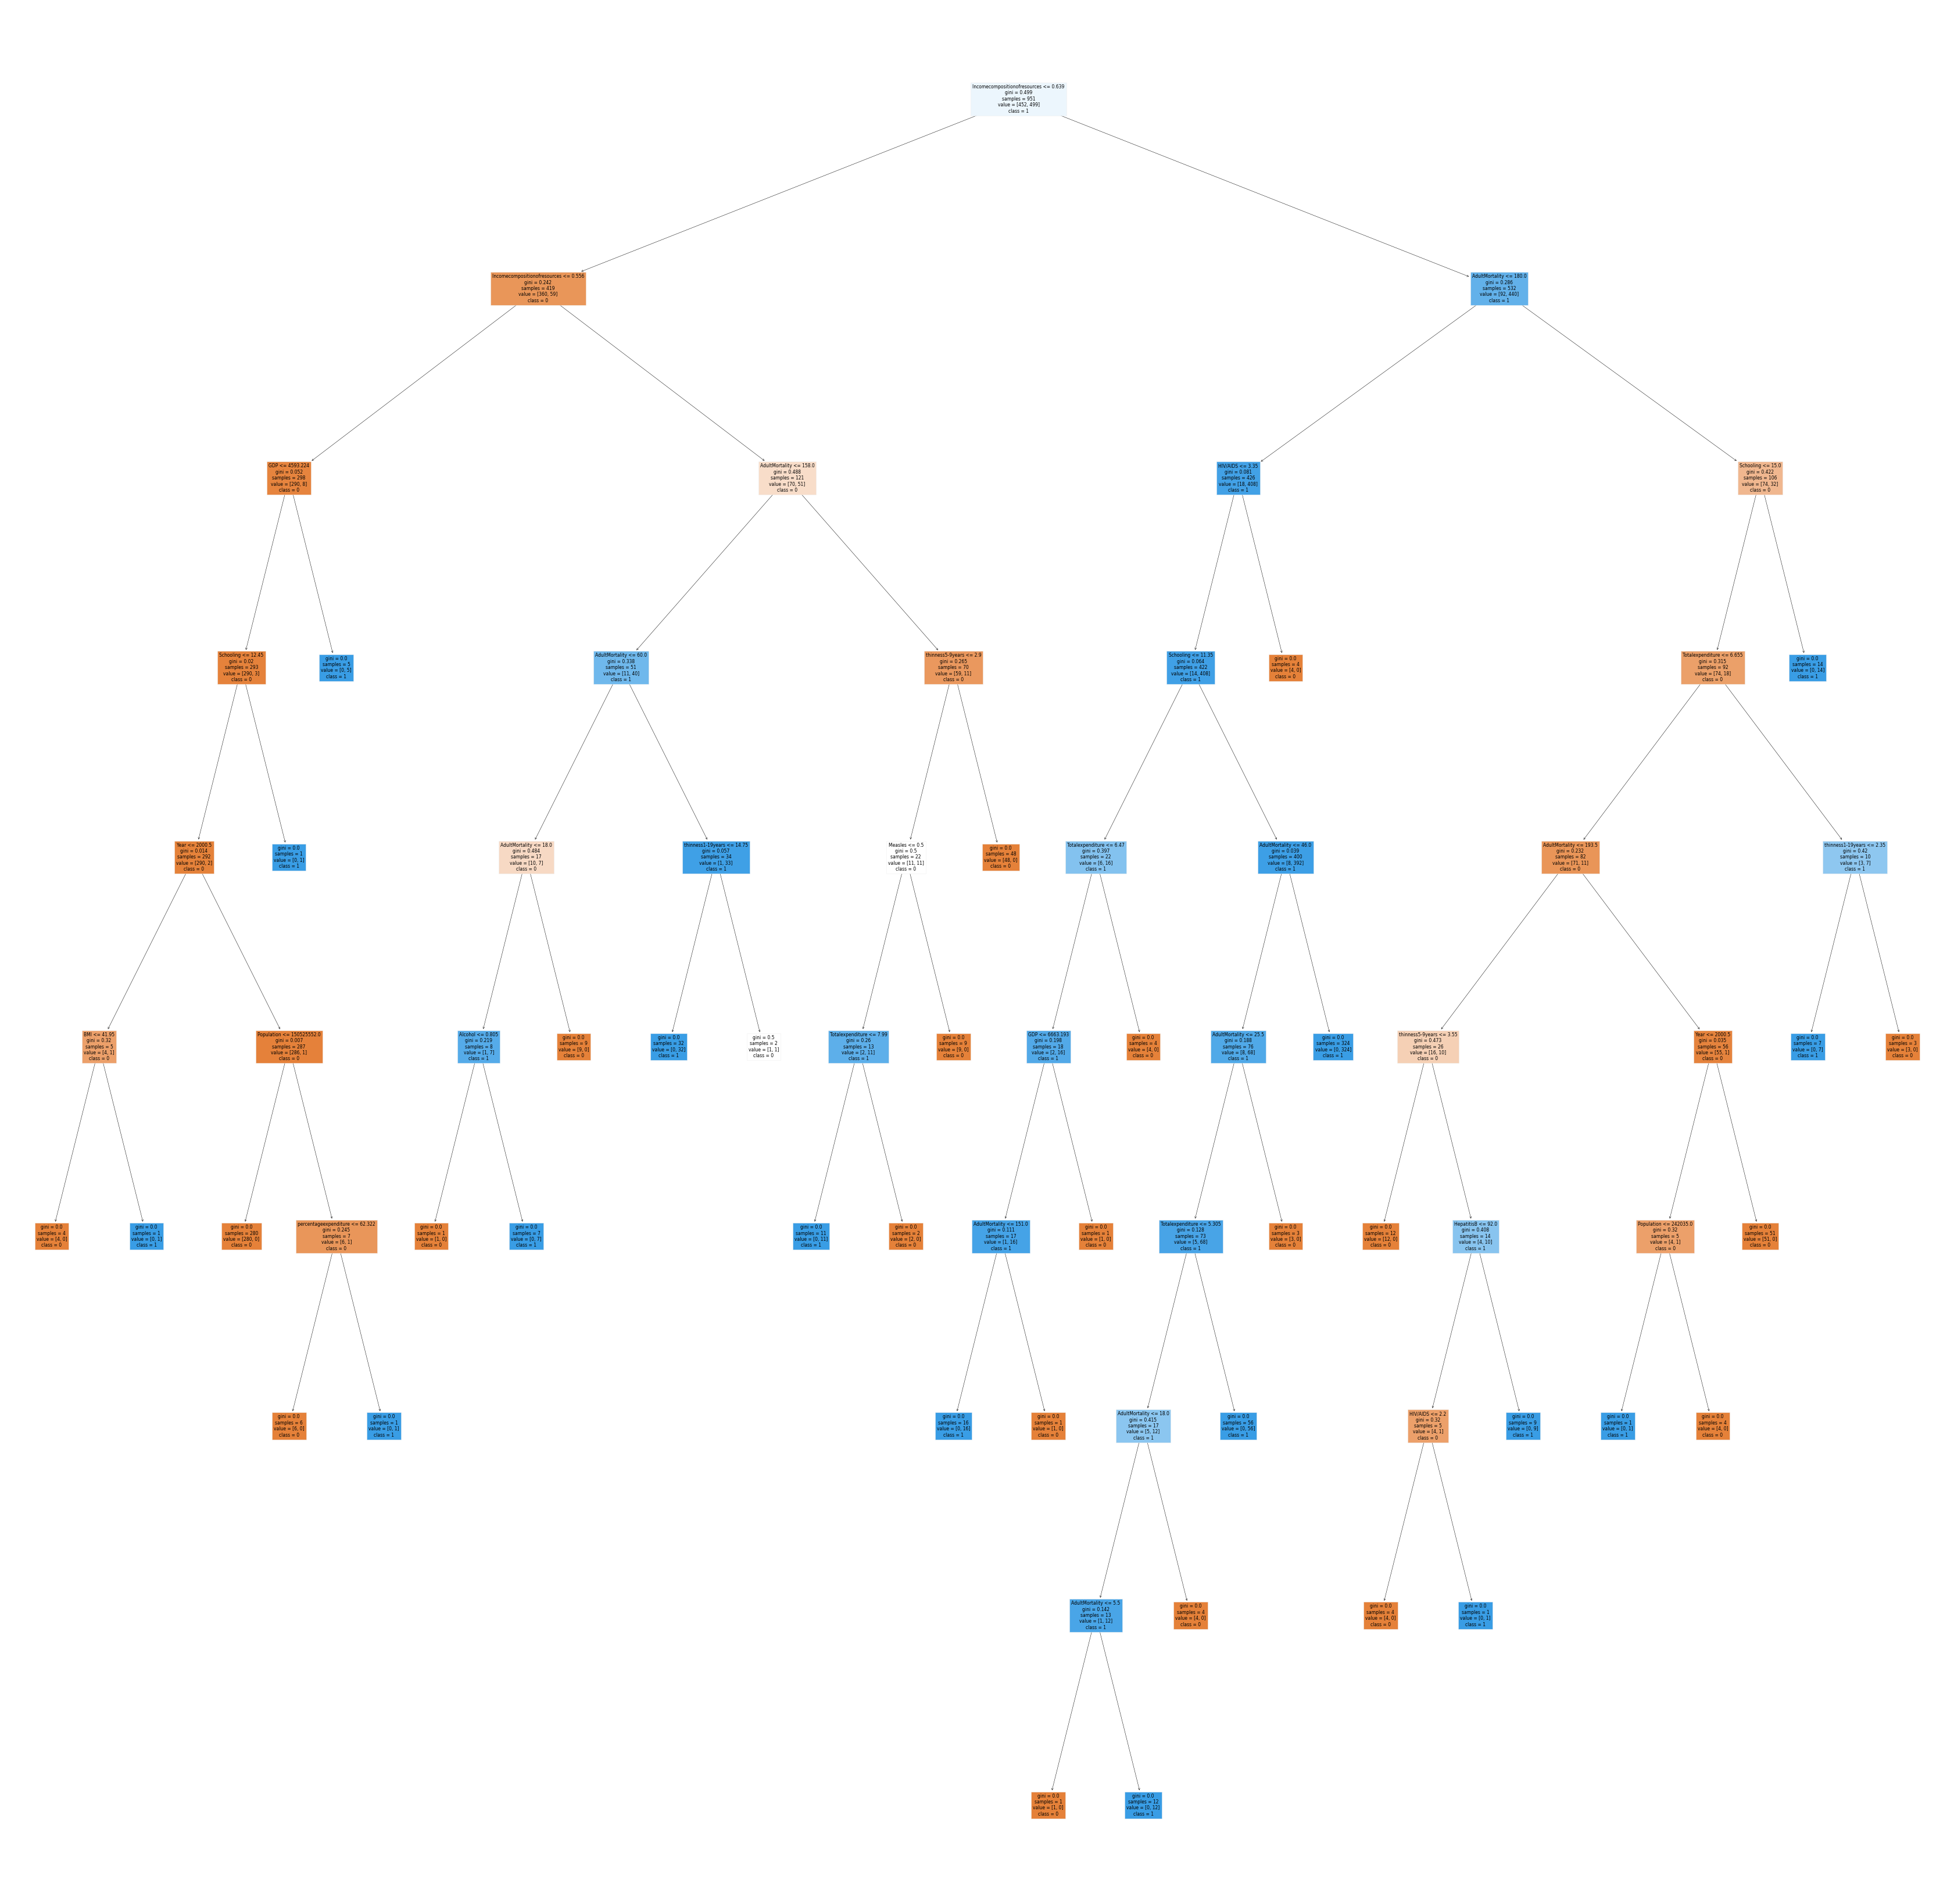

In [ ]:
fig = plt.figure(figsize=(60,60))
_ = tree.plot_tree(decision_tree_gini, 
                   feature_names=X_train.columns,  
                   class_names=['0','1'],
                   filled=True)
fig.savefig('image.png')

#plotted the decision tree graph using gini criteria

Logistic regression

In [ ]:
# logistic regression code
df.dropna(axis=0, inplace=True)
df.shape

(1586, 22)

In [ ]:
df['LE_Category3'] = pd.Categorical(np.zeros(len(df.index)), categories=[ '0', '1'])
df['LE_Category3'][df.Lifeexpectancy.between(0,69.99)] = '0'
df['LE_Category3'][df.Lifeexpectancy.between(70,100)] = '1'

In [ ]:

df.shape
label_encoder = preprocessing.LabelEncoder()
df["LE_Category3"] =label_encoder.fit_transform(df["LE_Category3"])

In [ ]:
df["LE_Category3"]

0       0
1       0
2       0
3       0
4       0
       ..
2933    0
2934    0
2935    0
2936    0
2937    0
Name: LE_Category3, Length: 1586, dtype: int64

In [ ]:
df.head()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,Adult_mortality_Category,LE_Category_1,LE_Category3
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,200 to 400,0,0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,200 to 400,0,0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,200 to 400,0,0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,200 to 400,0,0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,200 to 400,0,0


In [ ]:
df.isnull().sum()

Year                            0
Lifeexpectancy                  0
AdultMortality                  0
infantdeaths                    0
Alcohol                         0
percentageexpenditure           0
HepatitisB                      0
Measles                         0
BMI                             0
under-fivedeaths                0
Polio                           0
Totalexpenditure                0
Diphtheria                      0
HIV/AIDS                        0
GDP                             0
Population                      0
thinness1-19years               0
thinness5-9years                0
Incomecompositionofresources    0
Schooling                       0
Adult_mortality_Category        0
LE_Category_1                   0
LE_Category3                    0
dtype: int64

In [ ]:
X = pd.DataFrame(data=df,columns=['Alcohol','HepatitisB','Measles','BMI','Polio','Totalexpenditure','Diphtheria','HIV/AIDS'])
Y = labels = pd.DataFrame(df["LE_Category3"])
X = sm.add_constant(X)

In [ ]:
# implementation of logistic regression
logit_mod = sm.Logit(Y, X).fit()

Optimization terminated successfully.
         Current function value: 0.385151
         Iterations 10


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(X_train, y_train)
model3.score(X_test,y_test)

0.8018867924528302

In [ ]:
#Print Logistic Regression Results

print(logit_mod.summary())

                           Logit Regression Results                           
Dep. Variable:           LE_Category3   No. Observations:                 1586
Model:                          Logit   Df Residuals:                     1577
Method:                           MLE   Df Model:                            8
Date:                Wed, 15 Dec 2021   Pseudo R-squ.:                  0.4434
Time:                        17:48:05   Log-Likelihood:                -610.85
converged:                       True   LL-Null:                       -1097.4
Covariance Type:            nonrobust   LLR p-value:                9.425e-205
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -3.0350      0.415     -7.310      0.000      -3.849      -2.221
Alcohol              0.2209      0.023      9.446      0.000       0.175       0.267
HepatitisB          -0.0002 

In [ ]:
#Calculate the Odds Ratios
#Exponetializing the Beta Coefficients to convert them into Odds Ratios

np.exp(logit_mod.params)

const               0.048077
Alcohol             1.247164
HepatitisB          0.999782
Measles             1.000002
BMI                 1.027179
Polio               1.006386
Totalexpenditure    1.208452
Diphtheria          1.006871
HIV/AIDS            0.161622
dtype: float64

In [ ]:
#Calculate the 95% Confidence Intervals for the Odds Ratios
#Exponetializing the 95% confidence interval to convert them into Odds Ratios

np.exp(logit_mod.conf_int())

,0,1
const,0.021307,0.108481
Alcohol,1.191297,1.305650
HepatitisB,0.992878,1.006734
Measles,0.999990,1.000014
BMI,1.019487,1.034929
Polio,0.998499,1.014334
Totalexpenditure,1.128850,1.293667
Diphtheria,0.997813,1.016012
HIV/AIDS,0.110185,0.237071


In [ ]:
#Create Training and Testing Datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=33)

In [ ]:
#Create Peformance Measure Matrics

from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [ ]:
# all parameters not specified are set to their defaults

logistic = LogisticRegression()

In [ ]:
#Fit Logistic Regression Model

logisticclf = logistic.fit(X_train, y_train)

In [ ]:
#Predict Attrition Values

logisticpreds_test = logistic.predict(X_test)

In [ ]:
#Accuracy Score for Testing Data

print(logistic.score(X_test, y_test))

0.7830188679245284


In [ ]:
#Accuracy Score for Training Data

print(logistic.score(X_train, y_train))

0.7854889589905363


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
#Classification Report

print(classification_report(y_test, logisticpreds_test))

              precision    recall  f1-score   support

           0       0.80      0.72      0.75       148
           1       0.77      0.84      0.81       170

    accuracy                           0.78       318
   macro avg       0.78      0.78      0.78       318
weighted avg       0.78      0.78      0.78       318



In [ ]:
#Confusion Matrix

logisticcm = confusion_matrix(y_test, logisticpreds_test)
print(logisticcm)

[[106  42]
 [ 27 143]]


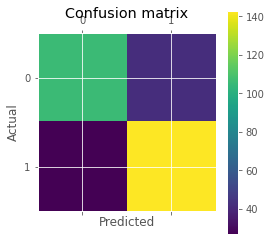

In [ ]:
#Visualize Confusion Matrix

import pylab as plt
%matplotlib inline
plt.matshow(logisticcm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Linear regression code
# importing necessary libraries
import statsmodels.formula.api as smf
results_alcohol = smf.ols('Lifeexpectancy ~ Alcohol', data=df).fit() # fitting LE and alcohol into linear model
print(results_alcohol.summary()) # printing summary

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     311.9
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           7.30e-64
Time:                        04:26:24   Log-Likelihood:                -5571.1
No. Observations:                1586   AIC:                         1.115e+04
Df Residuals:                    1584   BIC:                         1.116e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.0617      0.305    213.640      0.0

In [ ]:
# fitting LE and BMI into linear model
results_bmi = smf.ols('Lifeexpectancy ~ BMI', data=df).fit()
print(results_bmi.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     679.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.90e-125
Time:                        04:26:29   Log-Likelihood:                -5430.8
No. Observations:                1586   AIC:                         1.087e+04
Df Residuals:                    1584   BIC:                         1.088e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.7201      0.404    147.833      0.0

In [ ]:
# fitting LE and GDP into linear model
results_gdp = smf.ols('Lifeexpectancy ~ GDP', data=df).fit()
print(results_gdp.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     397.5
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           4.37e-79
Time:                        04:26:32   Log-Likelihood:                -5536.1
No. Observations:                1586   AIC:                         1.108e+04
Df Residuals:                    1584   BIC:                         1.109e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     67.1538      0.221    303.699      0.0

In [ ]:
# fitting LE and Year into linear model
results_gdp = smf.ols('Lifeexpectancy ~ Year', data=df).fit()
print(results_gdp.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.277
Date:                Wed, 15 Dec 2021   Prob (F-statistic):             0.0704
Time:                        04:26:35   Log-Likelihood:                -5712.1
No. Observations:                1586   AIC:                         1.143e+04
Df Residuals:                    1584   BIC:                         1.144e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -129.1193    109.472     -1.179      0.2

In [ ]:
# fitting LE and AdultMortality into linear model
results_am = smf.ols('Lifeexpectancy ~ AdultMortality', data=df).fit()
print(results_am.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     1519.
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.36e-233
Time:                        04:26:39   Log-Likelihood:                -5180.4
No. Observations:                1586   AIC:                         1.036e+04
Df Residuals:                    1584   BIC:                         1.038e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         77.4606      0.268    288.

In [ ]:
# fitting LE and infantdeaths into linear model
results_id = smf.ols('Lifeexpectancy ~ infantdeaths', data=df).fit()
print(results_id.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     46.14
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           1.55e-11
Time:                        04:26:43   Log-Likelihood:                -5690.9
No. Observations:                1586   AIC:                         1.139e+04
Df Residuals:                    1584   BIC:                         1.140e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       69.4590      0.228    304.996   

In [ ]:
df['Status'] = df1['Status']

In [ ]:
df['Country'] = df1['Country']

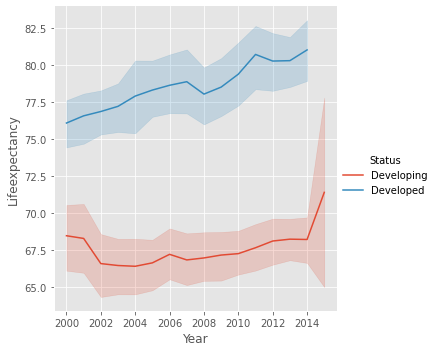

In [ ]:
# plot of LE vs year based on country status
sns.relplot(x="Year", y="Lifeexpectancy", kind = 'line', hue = 'Status', data=df);

In [ ]:
df.head()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,Adult_mortality_Category,LE_Category_1,LE_Category3,Status,Country,LE_Category
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,200 to 400,0,0,Developing,Afghanistan,0
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,200 to 400,0,0,Developing,Afghanistan,0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,200 to 400,0,0,Developing,Afghanistan,0
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,200 to 400,0,0,Developing,Afghanistan,0
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,200 to 400,0,0,Developing,Afghanistan,0


**Random Forest**

In [ ]:
#Random forest 
# Split Data into Independent and Dependent Variables :
import pandas as pd
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

df['LE_Category'] = pd.Categorical(np.zeros(len(df.index)), categories=[ '0', '1'])
df['LE_Category'][df.Lifeexpectancy.between(0,70)] = '0'
df['LE_Category'][df.Lifeexpectancy.between(71,100)] = '1'


x = df.drop(['Lifeexpectancy','Country','Status','LE_Category','LE_Category_1','LE_Category3','Adult_mortality_Category'], axis = 1)

y = df['LE_Category']



# Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)




from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, max_depth = 10).fit(x_train, y_train)

y_prediction = rfc.predict(x_train)

print(f'Accuracy of Random Forest Classifier on Train Set : {accuracy_score(y_train, y_prediction)*100:.2f}%')

y_prediction = rfc.predict(x_test)

print(f'Accuracy of Random Forest Classifier on Test Set : {accuracy_score(y_test, y_prediction)*100:.2f}%')

Accuracy of Random Forest Classifier on Train Set : 100.00%
Accuracy of Random Forest Classifier on Test Set : 98.43%


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters  = {'n_estimators' : [150, 200, 250, 300], 'max_depth' : [15, 20, 25]}

gsv_rfc = GridSearchCV(estimator = rfc, param_grid = parameters, n_jobs = -1, cv = 5).fit(x_train,y_train)

y_prediction = gsv_rfc.predict(x_train)

print(f'Accuracy of Random Forest Classifier on Train Set : {accuracy_score(y_train, y_prediction)*100:.2f}%')

y_prediction = gsv_rfc.predict(x_test)

Accuracy of Random Forest Classifier on Train Set : 100.00%


In [ ]:
print(x_train.size)
print(x_test.size)

24092
6042


In [ ]:
ridge_classifier = RidgeClassifier().fit(x_train,y_train)
y_prediction = ridge_classifier.predict(x_train)

print(f'f1-score of Random Forest Classifier on Train Set : {f1_score(y_train, y_prediction,pos_label= "1")*100:.2f}%')


y_prediction = ridge_classifier.predict(x_test)

print(f'f1-score of Random Forest Classifier on Test Set : {f1_score(y_test, y_prediction,pos_label= "1")*100:.2f}%')

f1-score of Random Forest Classifier on Train Set : 87.55%
f1-score of Random Forest Classifier on Test Set : 90.62%


XGBoost

In [ ]:
pip install xgboost

In [ ]:
df1.head()


,Country,Year,Status,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling,Alcohol_Category,LE_Category,Adult_mortality_Category,LE_Category_sns
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0 to 5,60 to 70,200 to 400,51 to 75
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0 to 5,50 to 60,200 to 400,51 to 75
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0 to 5,50 to 60,200 to 400,51 to 75
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0 to 5,50 to 60,200 to 400,51 to 75
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0 to 5,50 to 60,200 to 400,51 to 75


In [ ]:
df1.shape

(1586, 26)

In [ ]:
df_xgb = df1

In [ ]:
df_xgb = df_xgb.drop(['Alcohol_Category','LE_Category','LE_Category_sns'],axis=1)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [ ]:
# Split Data into Independent and Dependent Variables :
import numpy as np
df['LE_Category'] = pd.Categorical(np.zeros(len(df.index)), categories=[ '0', '1'])
df['LE_Category'][df.Lifeexpectancy.between(0,70)] = '0'
df['LE_Category'][df.Lifeexpectancy.between(71,100)] = '1'


x = df.drop(['Lifeexpectancy','Country','Status','LE_Category_1','LE_Category3','LE_Category','Adult_mortality_Category'], axis = 1)

y = df['LE_Category']

In [ ]:
x = df.drop('LE_Category' , axis = 1)

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [ ]:
x_train.dtypes

Year                              int64
AdultMortality                  float64
infantdeaths                      int64
Alcohol                         float64
percentageexpenditure           float64
HepatitisB                      float64
Measles                           int64
BMI                             float64
under-fivedeaths                  int64
Polio                           float64
Totalexpenditure                float64
Diphtheria                      float64
HIV/AIDS                        float64
GDP                             float64
Population                      float64
thinness1-19years               float64
thinness5-9years                float64
Incomecompositionofresources    float64
Schooling                       float64
dtype: object

In [ ]:
#L2 Regularization

ridge_classifier = RidgeClassifier().fit(x_train, y_train)

In [ ]:
x_train.head()

,Year,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
2024,2014,214.0,54,4.52,31.272322,67.0,58848,24.8,68,77.0,4.71,67.0,0.1,2842.938353,112249.0,1.0,9.7,0.676,11.7
2156,2010,26.0,16,7.92,63.787236,97.0,121,18.3,23,93.0,7.91,97.0,2.3,563.491487,1246842.0,6.5,6.3,0.454,10.0
1868,2008,169.0,3,3.64,275.064434,97.0,0,48.6,3,97.0,6.98,97.0,0.2,1518.853860,559456.0,1.9,1.8,0.607,11.1
458,2005,134.0,0,4.26,3.349817,93.0,0,24.3,0,95.0,4.86,95.0,0.8,248.134590,474567.0,8.5,8.5,0.582,11.2
2208,2007,149.0,0,3.85,47.736382,46.0,0,7.9,0,49.0,5.25,53.0,0.1,322.543121,182286.0,0.2,0.2,0.682,12.9


In [ ]:
print(x_train.dtypes)

Year                              int64
AdultMortality                  float64
infantdeaths                      int64
Alcohol                         float64
percentageexpenditure           float64
HepatitisB                      float64
Measles                           int64
BMI                             float64
under-fivedeaths                  int64
Polio                           float64
Totalexpenditure                float64
Diphtheria                      float64
HIV/AIDS                        float64
GDP                             float64
Population                      float64
thinness1-19years               float64
thinness5-9years                float64
Incomecompositionofresources    float64
Schooling                       float64
dtype: object


In [ ]:
x_train_new = x_train

In [ ]:
x_train_new.dtypes

Year                              int64
AdultMortality                  float64
infantdeaths                      int64
Alcohol                         float64
percentageexpenditure           float64
HepatitisB                      float64
Measles                           int64
BMI                             float64
under-fivedeaths                  int64
Polio                           float64
Totalexpenditure                float64
Diphtheria                      float64
HIV/AIDS                        float64
GDP                             float64
Population                      float64
thinness1-19years               float64
thinness5-9years                float64
Incomecompositionofresources    float64
Schooling                       float64
dtype: object

In [ ]:
x_test_new = x_test

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

model = XGBClassifier()
model.fit(x_train_new, y_train)

y_prediction = model.predict(x_train_new)

print(f'Accuracy of XG Boost on Train Set : {accuracy_score(y_train, y_prediction)*100:.2f}%')

y_prediction = model.predict(x_test_new)

print(f'Accuracy of XG Boost on Test Set : {accuracy_score(y_test, y_prediction)*100:.2f}%')

#Grid search for best fit and predicting accuracy of model

Accuracy of XG Boost on Train Set : 99.45%
Accuracy of XG Boost on Test Set : 98.43%


In [ ]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 10),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(x_train_new, y_train)

#using roc auc metric to find the best split for prediction

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=XGBClassifier(nthread=4, seed=42), n_jobs=10,
             param_grid={'learning_rate': [0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='roc_auc', verbose=True)

In [ ]:
y_prediction = ridge_classifier.predict(x_train_new)

print(f'f1-score of XG Boost Classifier on Train Set : {f1_score(y_train, y_prediction,pos_label="1")*100:.2f}%')


y_prediction = ridge_classifier.predict(x_test_new)

print(f'f1-score of XG Boost Classifier on Test Set : {f1_score(y_test, y_prediction,pos_label="1")*100:.2f}%')

#printing out f1 scores which are based on precision and recall

f1-score of XG Boost Classifier on Train Set : 87.55%
f1-score of XG Boost Classifier on Test Set : 90.62%
